## *Heart Failure Prediction Model*

In [1]:
#import data manupulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data import 
url='https://raw.githubusercontent.com/Saimehtre18/Heart_Failure_Prediction/refs/heads/main/heart.csv'
df=pd.read_csv(url)
df.sample(frac=1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
315,74,M,ATA,145,0,1,ST,123,N,1.3,Up,1
455,59,M,ASY,154,0,0,ST,131,Y,1.5,Up,0
694,56,M,ATA,120,236,0,Normal,178,N,0.8,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
878,49,M,ATA,130,266,0,Normal,171,N,0.6,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
158,44,M,ASY,130,290,0,Normal,100,Y,2.0,Flat,1
881,44,M,ATA,120,263,0,Normal,173,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
137,39,M,ATA,120,241,0,ST,146,N,2.0,Up,0


In [3]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [4]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [5]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### *Converting Categorical Columns into Numeric*

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])
df['Sex']=le.fit_transform(df['Sex'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


### *Descriptive Statistics*

In [10]:
from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,Age,28.0,77.0,53.510893,54.0,47.00,60.0,13.00,9.432617,-0.195933,-0.386140,No Outliers
1,Sex,0.0,1.0,0.789760,1.0,1.00,1.0,0.00,0.407701,-1.424540,0.029372,Has Outliers
2,ChestPainType,0.0,3.0,0.781046,0.0,0.00,2.0,2.00,0.956519,0.793916,-0.717257,No Outliers
3,RestingBP,0.0,200.0,132.396514,120.0,120.00,140.0,20.00,18.514154,0.179839,3.271251,Has Outliers
4,Cholesterol,0.0,603.0,198.799564,0.0,173.25,267.0,93.75,109.384145,-0.610086,0.118208,Has Outliers
5,FastingBS,0.0,1.0,0.233115,0.0,0.00,0.0,0.00,0.423046,1.264484,-0.401960,Has Outliers
6,RestingECG,0.0,2.0,0.989107,1.0,1.00,1.0,0.00,0.631671,0.008492,-0.487634,Has Outliers
7,MaxHR,60.0,202.0,136.809368,150.0,120.00,156.0,36.00,25.460334,-0.144359,-0.448248,Has Outliers
8,ExerciseAngina,0.0,1.0,0.404139,0.0,0.00,1.0,1.00,0.490992,0.391329,-1.850898,No Outliers
9,Oldpeak,-2.6,6.2,0.887364,0.0,0.00,1.5,1.50,1.066570,1.022872,1.203064,Has Outliers


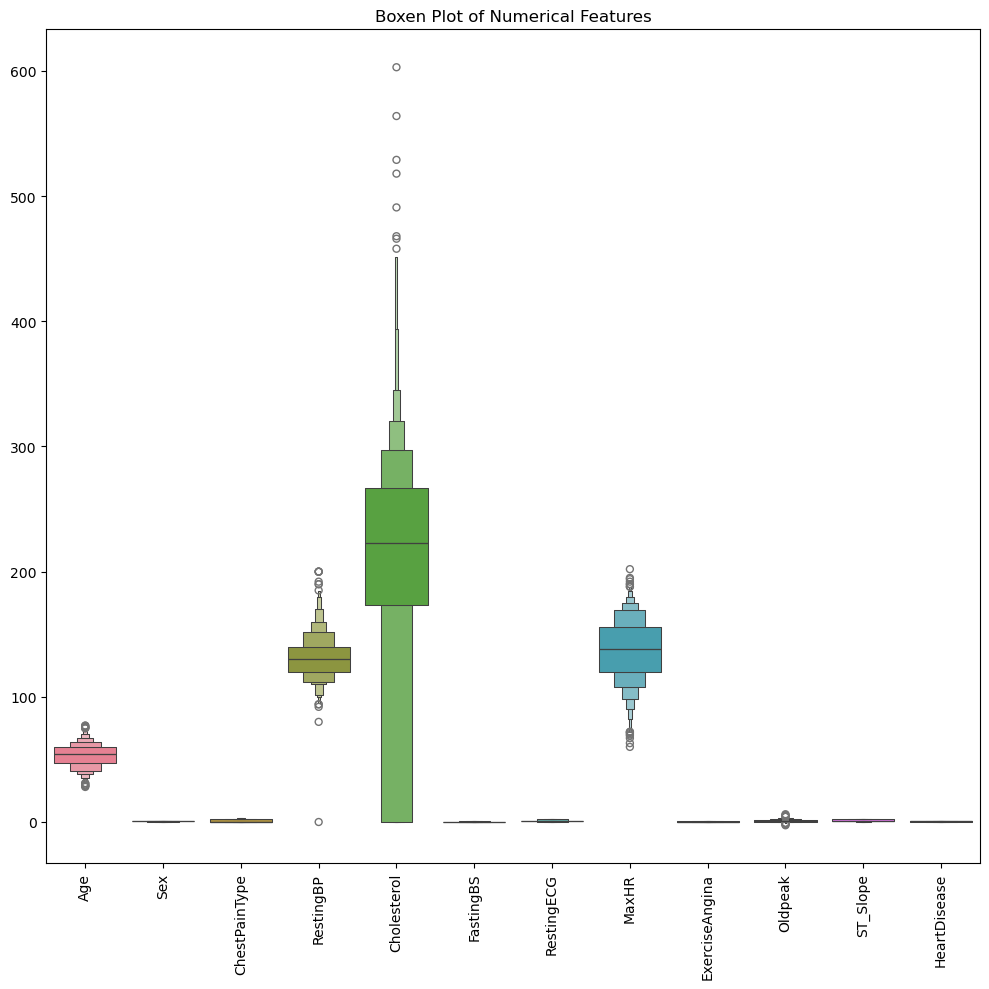

In [11]:
# Checking BoxenPlot 
plt.figure(figsize=(10, 10))
sns.boxenplot(data= df)

plt.xticks(rotation = 90)  
plt.title("Boxen Plot of Numerical Features")
plt.tight_layout()
plt.show()

### *Capping Outlier through IQR Method*

In [12]:
# Capping Outliers 
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

outlier_cols = ['Sex', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG','MaxHR','Oldpeak']
for col in outlier_cols:
    df = cap_outliers(df, col)

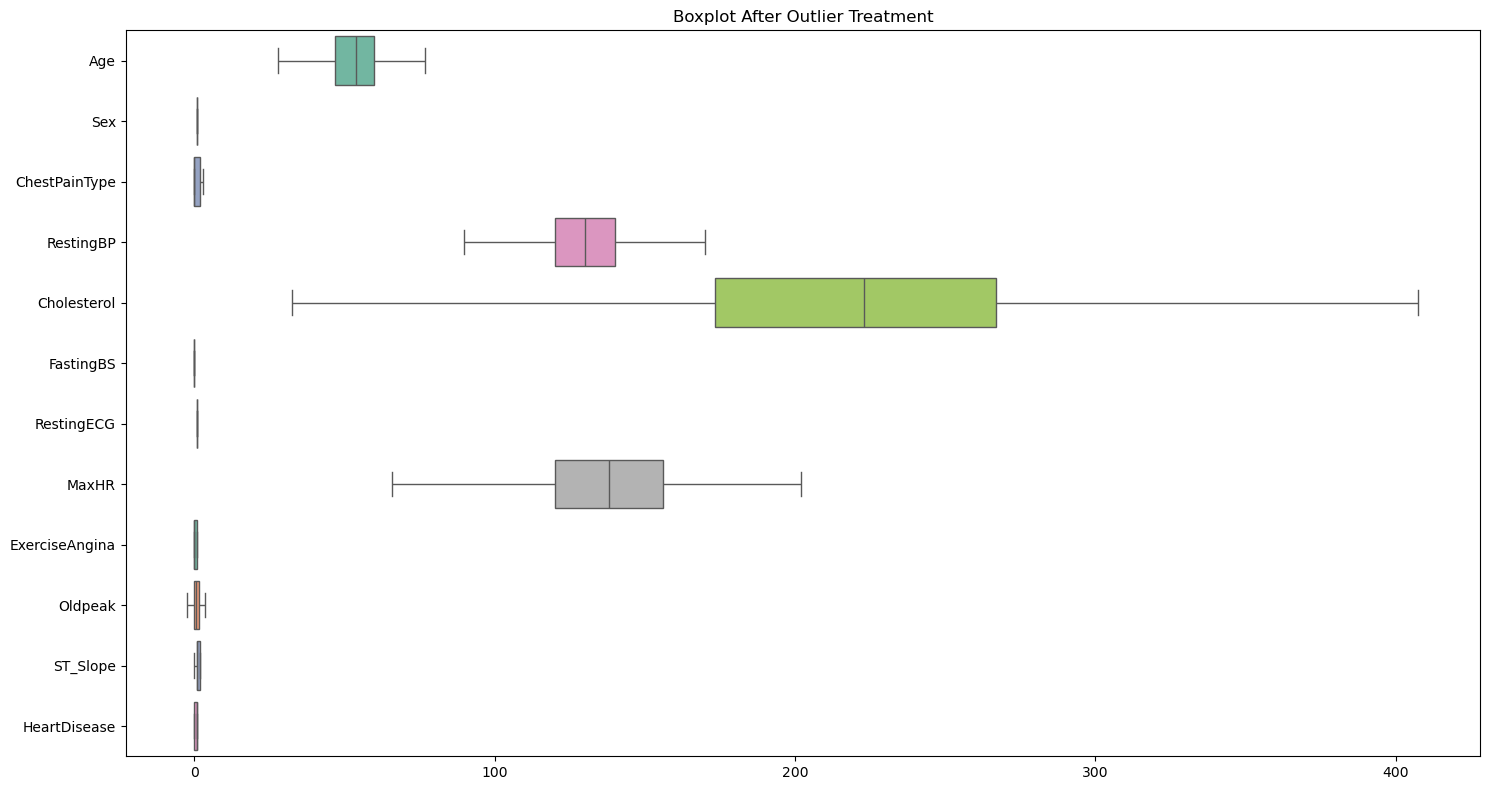

In [13]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

### *Checking the Corelation of the columsns with the target column*

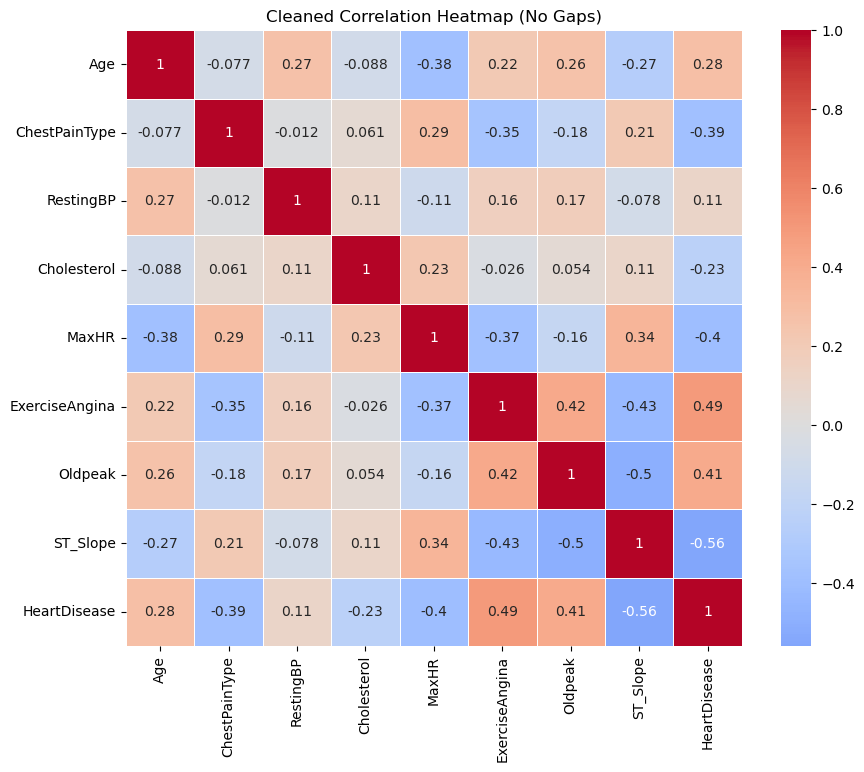

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation
corr = df.corr()

# Drop rows and columns with all NaNs (if any)
corr = corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Cleaned Correlation Heatmap (No Gaps)")
plt.show()

### *Spliting the Data*

In [15]:
X=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [16]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [17]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


### *Scaling & Model Evalution*

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

### *RandomForest Classifier*

In [19]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

Accuracy of RandomForestClassifier:  0.8532608695652174
Classification Report of RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        77
           1       0.93      0.81      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



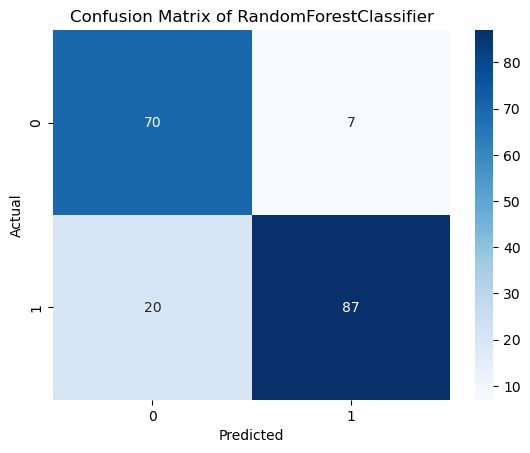

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

accuracy_score_LR=accuracy_score(y_test,y_pred)
confusion_matrix_LR=confusion_matrix(y_test,y_pred)
print("Accuracy of RandomForestClassifier: ",accuracy_score_LR)
# print("Confusion Matrix of RandomForestClassifier: \n",confusion_matrix_LR)
print("Classification Report of RandomForestClassifier: \n",classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### *K-Fold Cross Validation*

In [21]:
from sklearn.model_selection import KFold, cross_val_score

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RF, X, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average CV Accuracy:", np.mean(scores))


Cross-validation scores: [0.85326087 0.86413043 0.84782609 0.82513661 0.84153005]
Average CV Accuracy: 0.8463768115942027


### *Hyperparameter Tuning*

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the base model
RF = RandomForestClassifier(random_state=42)

# Define hyperparameter grid (typically smaller for GridSearch due to full search)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'bootstrap': [True, False]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=RF,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit the grid search on the whole dataset
grid_search.fit(X, y)

# Get the best model
RF = grid_search.best_estimator_

# Optional: print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)



Fitting 3 folds for each of 800 candidates, totalling 2400 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-validation Score: 0.835511982570806


### *DecisionTree Classifier*

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)

Accuracy of DecisionTreeClassifier:  0.7717391304347826
Classification Report of DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        77
           1       0.87      0.71      0.78       107

    accuracy                           0.77       184
   macro avg       0.78      0.78      0.77       184
weighted avg       0.79      0.77      0.77       184



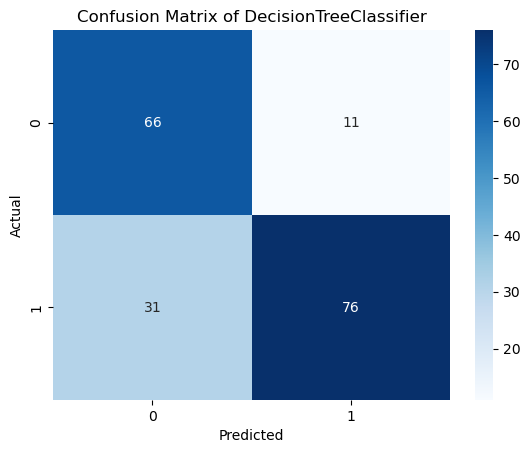

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

accuracy_score_LR=accuracy_score(y_test,y_pred)
confusion_matrix_LR=confusion_matrix(y_test,y_pred)
print("Accuracy of DecisionTreeClassifier: ",accuracy_score_LR)
# print("Confusion Matrix of DecisionTreeClassifier: \n",confusion_matrix_LR)
print("Classification Report of DecisionTreeClassifier: \n",classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of DecisionTreeClassifier')
plt.show()

### *K-Fold for DecesionTreeClassifier*

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize the model
DT = DecisionTreeClassifier()

# Set up K-Fold (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model using cross-validation
cv_scores = cross_val_score(DT, X, y, cv=kf, scoring='accuracy')

# Print the accuracy for each fold and the average accuracy
print(f"Cross-validation scores: {cv_scores}")
print(f"Average accuracy: {np.mean(cv_scores):.4f}")


Cross-validation scores: [0.7826087  0.76630435 0.81521739 0.79781421 0.79234973]
Average accuracy: 0.7909


In [26]:
from xgboost import XGBClassifier
XB=XGBClassifier()
XB.fit(X_train,y_train)
y_pred=XB.predict(X_test)

Accuracy of XGBClassifier:  0.8097826086956522
Classification Report of XGBClassifier: 
               precision    recall  f1-score   support

           0       0.72      0.88      0.80        77
           1       0.90      0.76      0.82       107

    accuracy                           0.81       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.83      0.81      0.81       184



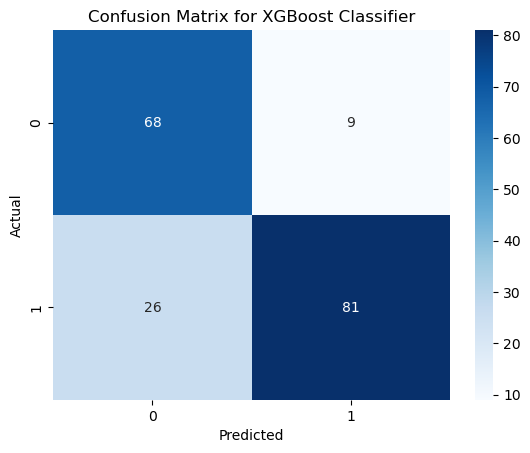

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

accuracy_score_LR=accuracy_score(y_test,y_pred)
# confusion_matrix_LR=confusion_matrix(y_test,y_pred)
print("Accuracy of XGBClassifier: ",accuracy_score_LR)
print("Classification Report of XGBClassifier: \n",classification_report(y_test,y_pred))
# print("Confusion Matrix of XGBClassifier: \n",confusion_matrix_LR)

cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()